In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
db = np.load('LungNet/lidc-train.npz', allow_pickle=True)['db'][()]

In [7]:
X = db['X']

In [54]:
def plot_histogram(obs, show=True):
    plt.hist(obs.reshape(-1), bins=50)
    if show:
        plt.show()
def plot_image(obs, show=True):
    plt.imshow(np.squeeze(obs),cmap='gray')
    if show:
        plt.show()

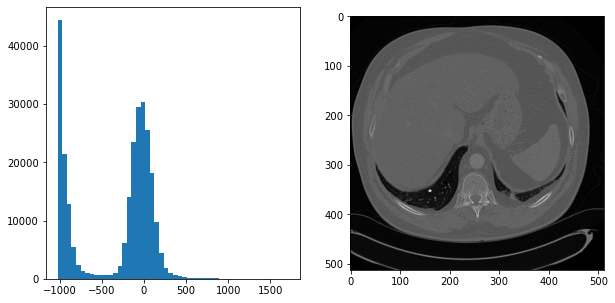

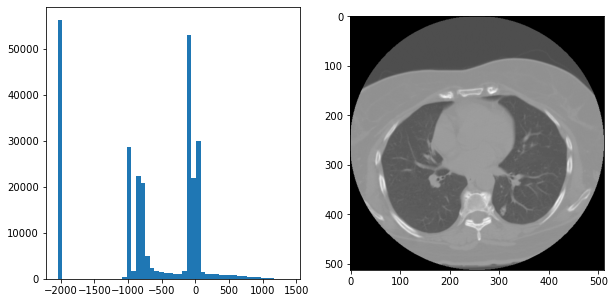

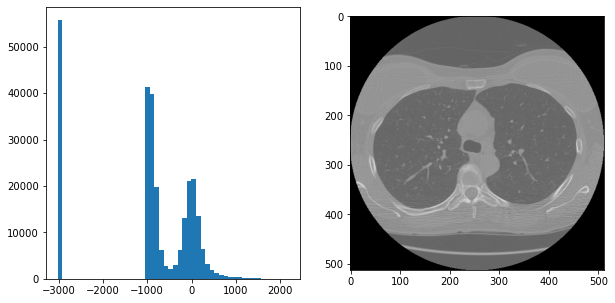

In [55]:
for i in range(3):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.subplot(1, 2, 1)
    plot_histogram(X[i], show=False)
    plt.subplot(1, 2, 2)
    plot_image(X[i], show=False)
    plt.show()

In [2]:
#https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

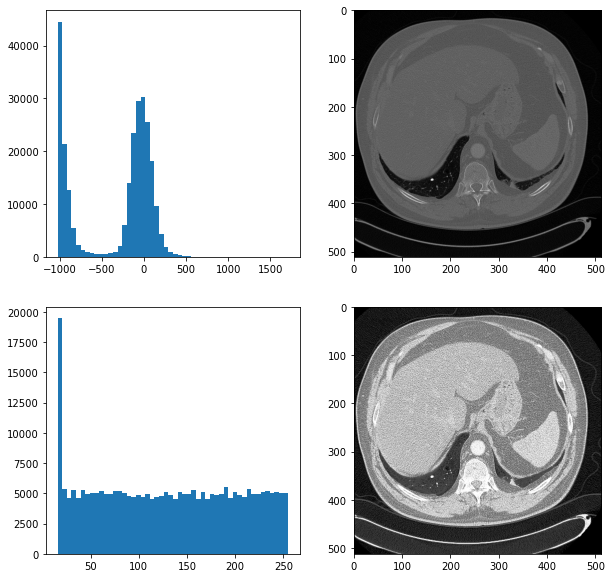

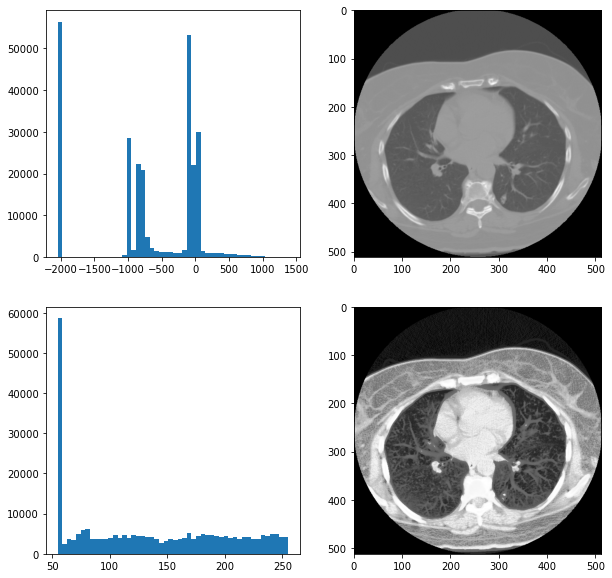

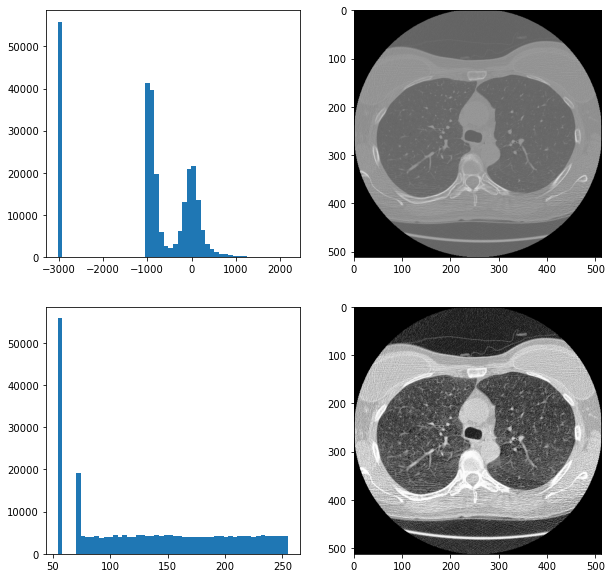

In [56]:
for i in range(3):
    obs = X[i]
    equalized = image_histogram_equalization(X[i], 1024)[0]
    plt.rcParams["figure.figsize"] = (10,10)
    plt.subplot(2, 2, 1)
    plot_histogram(X[i], show=False)
    plt.subplot(2, 2, 2)
    plot_image(X[i], show=False)
    plt.subplot(2, 2, 3)
    plot_histogram(equalized, show=False)
    plt.subplot(2, 2, 4)
    plot_image(equalized, show=False)
    plt.show()

### Processing all images

In [1]:
import numpy as np
from tqdm import tqdm

In [5]:
db = np.load('LungNet/lidc-train.npz', allow_pickle=True)['db'][()]
for i in tqdm(range(len(db['X']))):
    db['X'][i] = image_histogram_equalization(db['X'][i], 1024)[0]
np.savez_compressed('LungNet/lidc-equalized-train.npz', db=db)

100%|██████████| 11708/11708 [03:49<00:00, 51.06it/s]


In [3]:
db = np.load('LungNet/lidc-val.npz', allow_pickle=True)['db'][()]
for i in tqdm(range(len(db['X']))):
    db['X'][i] = image_histogram_equalization(db['X'][i], 1024)[0]
np.savez_compressed('LungNet/lidc-equalized-val.npz', db=db)

100%|██████████| 2927/2927 [00:56<00:00, 51.58it/s]


### Results

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
pre_log = pd.read_csv('LungNet/model-7d3197eb-7279-49f6-992e-95feb4df0493/training.log')
post_log = pd.read_csv('LungNet/model-35648d58-7770-4696-b71e-65c126c91c2e/training.log')
small_images_log = pd.read_csv('LungNet/model-b421c232-25aa-4235-b6eb-cc125d4ff2a2/training.log')

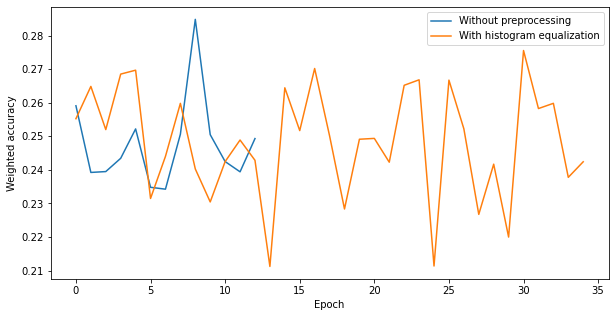

In [50]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(pre_log['epoch'], pre_log['val_waccOA'])
plt.plot(post_log['epoch'], post_log['val_waccOA'])
plt.legend(['Without preprocessing', 'With histogram equalization'])
plt.ylabel('Weighted accuracy')
plt.xlabel('Epoch')
plt.show()

### Results for cutted images

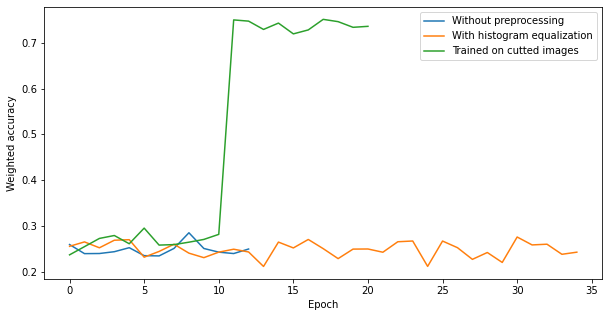

In [51]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(pre_log['epoch'], pre_log['val_waccOA'])
plt.plot(post_log['epoch'], post_log['val_waccOA'])
plt.plot(small_images_log['epoch'], small_images_log['val_waccOA'])
plt.legend(['Without preprocessing', 'With histogram equalization', 'Trained on cutted images'])
plt.ylabel('Weighted accuracy')
plt.xlabel('Epoch')
plt.show()